# ☕ Coffee Sales Analytics - Documentation


## Project Overview
This notebook performs exploratory data analysis (EDA) on a coffee shop sales dataset to understand customer behavior, sales patterns, and business insights. The analysis uses pandas for data manipulation, matplotlib and seaborn for visualizations.

## Dataset Information
- **Source**: ![Kaggle - Coffee Sales Dataset](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset/data)(https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset/data)
- **Size**: 3,547 transactions
- **Columns**: 11 features including temporal, product, and transaction data
- **Key Variables**:
  - `money`: Transaction amount (target variable)
  - `hour_of_day`: Hour of transaction (6-23)
  - `Weekday`: Day of week (Mon-Sun)
  - `Month_name`: Month (Jan-Dec)
  - `coffee_name`: Product type
  - `Time_of_Day`: Morning/Afternoon/Evening
  - `cash_type`: Payment method (card/cash)


## Analysis Sections

### 1. Data Loading & Initial Exploration
- Loads the CSV dataset
- Displays basic dataset information (head, info, describe)
- Provides overview of data structure and basic statistics

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###  Data Loading

Load the coffee sales dataset from CSV file for analysis.


In [64]:
coffee_sales = pd.read_csv('Coffee_sales.csv')


### Initial Data Exploration

Let's examine the dataset structure, data types, and get a statistical overview of our coffee sales data.


In [65]:
print(coffee_sales.head())
print(coffee_sales.info())
print(coffee_sales.describe())


   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----

### Dataset Summary

**Key Findings from Initial Exploration:**
- **Total Transactions**: 3,547 coffee sales records
- **Data Quality**: No missing values detected - clean dataset
- **Average Transaction Value**: $31.65 per sale
- **Price Range**: $18.12 to $35.76 (reasonable coffee shop pricing)
- **Peak Hours**: Most transactions occur between 10 AM - 7 PM
- **Time Period**: Multi-month data with proper chronological ordering


### Data Quality Assessment

Before proceeding with analysis, let's verify data integrity by checking for missing values, duplicates, and outliers.


In [66]:
print("Missing Values:")
print(coffee_sales.isnull().sum())
print(f"\nDuplicate Records: {coffee_sales.duplicated().sum()}")


Missing Values:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

Duplicate Records: 0


### Outlier Analysis

Let's examine the transaction data for any unusual values that might indicate data entry errors or special pricing situations.


In [67]:
#checking for outliars in the money column
quartile_25 = np.quantile(coffee_sales["money"],0.25)
quartile_75 = np.quantile(coffee_sales["money"],0.75)

print(quartile_25,quartile_75)

IQR = quartile_75 - quartile_25

lower_outliers = quartile_25 - 1.5*IQR
upper_outliers = quartile_75 + 1.5*IQR
print(coffee_sales[coffee_sales["money"]<lower_outliers])
print(coffee_sales[coffee_sales["money"]>upper_outliers])


27.92 35.76
Empty DataFrame
Columns: [hour_of_day, cash_type, money, coffee_name, Time_of_Day, Weekday, Month_name, Weekdaysort, Monthsort, Date, Time]
Index: []
Empty DataFrame
Columns: [hour_of_day, cash_type, money, coffee_name, Time_of_Day, Weekday, Month_name, Weekdaysort, Monthsort, Date, Time]
Index: []


### 2. Monthly Sales Analysis
- **Objective**: Identify the best performing month
- **Method**: Groups data by month and sums sales
- **Key Finding**: March has the highest total sales ($15,891.64)
- **Visualization**: Bar chart showing monthly sales trends

Lets first find out which month has the highest total sales of coffee.

In [113]:
grouped_by_month = coffee_sales.groupby(["Month_name"])["money"].sum().reset_index()
best_performing_month_month = grouped_by_month.loc[grouped_by_month['money'].idxmax()]
print(f"Best performing month: {best_performing_month_month['Month_name']}")
print(f"Total sales: ${best_performing_month_month['money']:.2f}")

Best performing month: Mar
Total sales: $15891.64


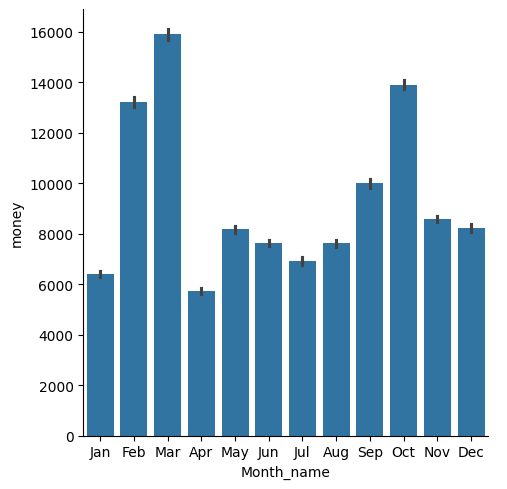

In [114]:
month_order = ["Jan","Feb","Mar","Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.catplot(x="Month_name",y="money",data=coffee_sales,kind="bar",estimator=sum,order=month_order)
plt.show()

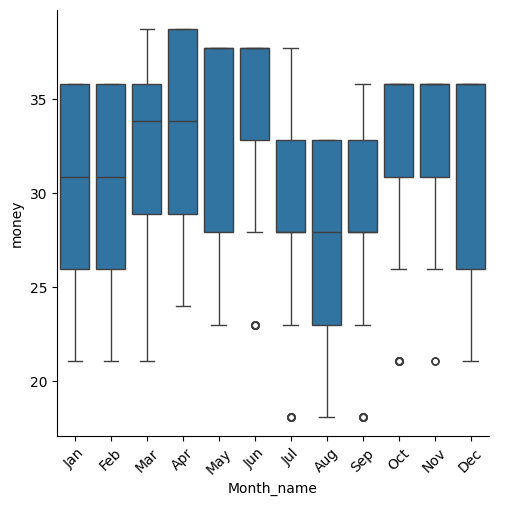

In [115]:
sns.catplot(x='Month_name',y='money',data=coffee_sales,kind='box',order=month_order,estimator=sum)
plt.xticks(rotation=45)
plt.show()

### 3. Day-of-Week Analysis
- **Objective**: Understand weekly sales patterns
- **Method**: Groups by weekday and calculates sales metrics
- **Visualization**: Bar chart showing sales by day

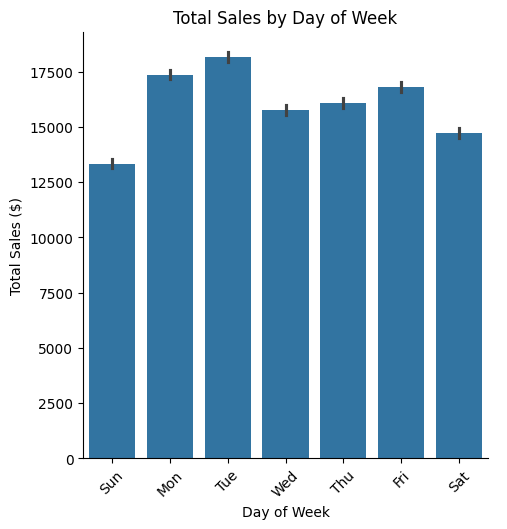

In [195]:
order_weekday=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
sns.catplot(x="Weekday",y="money",data=coffee_sales,kind="bar",estimator=sum,order=order_weekday)
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.xlabel('Day of Week')
plt.title('Total Sales by Day of Week')
plt.show()

### 4. Product Performance Analysis
- **Objective**: Determine most popular coffee types
- **Method**: Groups by coffee name and calculates total sales
- **Key Findings**: Latte, Americano with Milk, Americano, and Cappuccino are top performers
- **Visualization**: Bar chart ranked by sales volume


In [196]:
grouped_by_coffee_type = coffee_sales.groupby(["coffee_name"])["money"].sum().reset_index().sort_values(by="money",ascending=False)
print(grouped_by_coffee_type)

           coffee_name     money
7                Latte  26875.30
1  Americano with Milk  24751.12
2           Cappuccino  17439.14
0            Americano  14650.26
6        Hot Chocolate   9933.46
3                Cocoa   8521.16
4              Cortado   7384.86
5             Espresso   2690.28


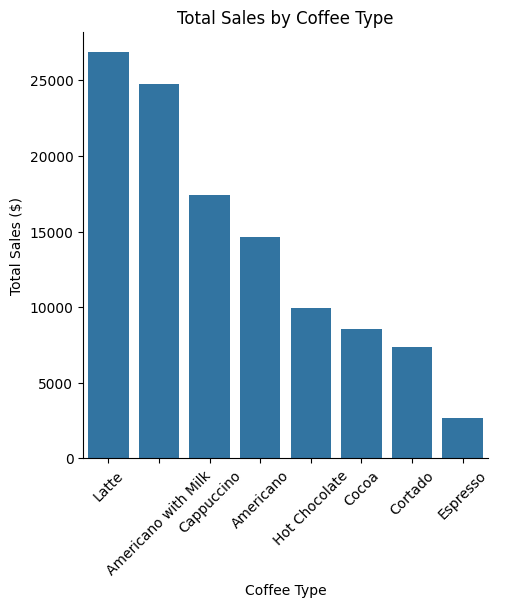

In [197]:
sns.catplot(x='coffee_name',y='money',data=grouped_by_coffee_type,kind='bar',estimator=sum)
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.xlabel('Coffee Type')
plt.title('Total Sales by Coffee Type')


plt.show()


### 5. Busiest Day/Time Combination Analysis *(New Addition)*
- **Objective**: Find peak business periods
- **Method**: Cross-tabulation of weekday × time_of_day
- **Metrics Calculated**:
  - Total sales by combination
  - Transaction count (volume)
  - Average transaction value
- **Visualizations**:
  - Heatmap showing sales intensity
  - Summary statistics for top combinations

In [198]:
# Analyze sales by weekday and time of day combination
day_time_sales = coffee_sales.groupby(['Weekday', 'Time_of_Day'])['money'].agg(['sum', 'count', 'mean']).reset_index()
day_time_sales.columns = ['Weekday', 'Time_of_Day', 'Total_Sales', 'Transaction_Count', 'Avg_Transaction']

print("Top 10 busiest day/time combinations by total sales:")
print(day_time_sales.sort_values('Total_Sales', ascending=False).head(10))


Top 10 busiest day/time combinations by total sales:
   Weekday Time_of_Day  Total_Sales  Transaction_Count  Avg_Transaction
17     Tue       Night      6812.38                205        33.231122
14     Thu       Night      6468.50                195        33.171795
16     Tue     Morning      6343.92                207        30.646957
6      Sat   Afternoon      6307.30                194        32.511856
4      Mon     Morning      5987.34                193        31.022487
1      Fri     Morning      5839.36                193        30.255751
5      Mon       Night      5711.66                174        32.825632
3      Mon   Afternoon      5664.10                177        32.000565
20     Wed       Night      5531.38                170        32.537529
0      Fri   Afternoon      5504.90                172        32.005233


In [199]:
sales_pivot = day_time_sales.pivot(index='Weekday', columns='Time_of_Day', values='Total_Sales')

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sales_pivot = sales_pivot.reindex(weekday_order)

print("Sales by Day/Time Combination (Heatmap data):")
print(sales_pivot.round(2))


Sales by Day/Time Combination (Heatmap data):
Time_of_Day  Afternoon  Morning    Night
Weekday                                 
Mon            5664.10  5987.34  5711.66
Tue            5012.08  6343.92  6812.38
Wed            5147.76  5071.32  5531.38
Thu            5203.58  4419.32  6468.50
Fri            5504.90  5839.36  5458.40
Sat            6307.30  4570.62  3855.60
Sun            5290.32  3697.32  4348.42


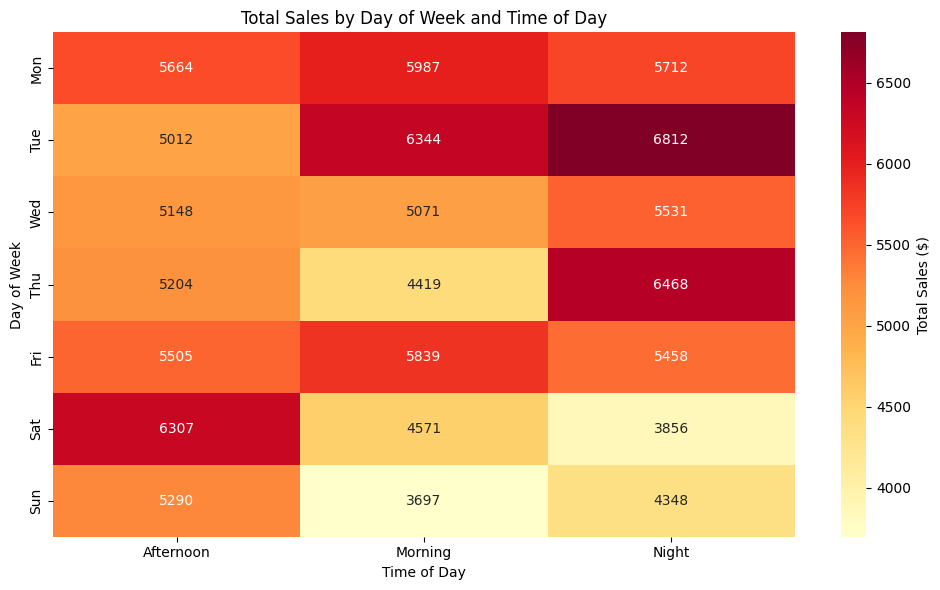

In [200]:
# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Total Sales ($)'})
plt.title('Total Sales by Day of Week and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


In [201]:
busiest_combination = day_time_sales.loc[day_time_sales['Total_Sales'].idxmax()]

print(f"BUSIEST DAY/TIME COMBINATION:")
print(f"Day: {busiest_combination['Weekday']}")
print(f"Time: {busiest_combination['Time_of_Day']}")
print(f"Total Sales: ${busiest_combination['Total_Sales']:.2f}")
print(f"Number of Transactions: {busiest_combination['Transaction_Count']}")
print(f"Average Transaction: ${busiest_combination['Avg_Transaction']:.2f}")


BUSIEST DAY/TIME COMBINATION:
Day: Tue
Time: Night
Total Sales: $6812.38
Number of Transactions: 205
Average Transaction: $33.23


In [202]:
busiest_by_volume = day_time_sales.loc[day_time_sales['Transaction_Count'].idxmax()]

print(f"\nBUSIEST BY TRANSACTION VOLUME:")
print(f"Day: {busiest_by_volume['Weekday']}")
print(f"Time: {busiest_by_volume['Time_of_Day']}")
print(f"Number of Transactions: {busiest_by_volume['Transaction_Count']}")
print(f"Total Sales: ${busiest_by_volume['Total_Sales']:.2f}")
print(f"Average Transaction: ${busiest_by_volume['Avg_Transaction']:.2f}")



BUSIEST BY TRANSACTION VOLUME:
Day: Tue
Time: Morning
Number of Transactions: 207
Total Sales: $6343.92
Average Transaction: $30.65


## Key Insights Generated

### Temporal Patterns
- Peak sales month: September
- Daily and hourly patterns identified through visualizations
- Busiest day/time combinations for strategic planning

### Product Insights
- Top 4 coffee types drive majority of sales
- Price distribution analysis across product types
- Revenue contribution by product category

### Business Intelligence
- Customer behavior patterns by time of day
- Payment method preferences
- Seasonal trends in coffee consumption

## Visualization Types Used
1. **Bar Charts**: Monthly sales, product performance, weekday analysis
2. **Box Plots**: Distribution analysis with formatting options
3. **Heatmap**: Day/time combination analysis
4. **Statistical Summaries**: Descriptive analytics

## Technical Implementation
- **Data Manipulation**: Pandas groupby operations, pivot tables
- **Visualization**: Seaborn catplot, matplotlib formatting
- **Custom Formatting**: Y-axis scaling (thousands), rotation of labels
- **Statistical Aggregation**: sum, count, mean calculations

## Business Applications
- **Staff Scheduling**: Use peak time data for optimal staffing
- **Inventory Management**: Stock popular items during high-traffic periods
- **Marketing Strategy**: Target promotions during slower periods
- **Revenue Optimization**: Focus on high-value time slots and products

## Future Enhancement Opportunities
- Customer segmentation analysis
- Price elasticity studies
- Seasonal trend forecasting
- Customer lifetime value analysis
- Correlation analysis between variables

This notebook serves as a comprehensive foundation for coffee shop business intelligence and data-driven decision making.